# DS-210: Programming for Data Science


# Lecture 6:<br>&nbsp;&nbsp;&nbsp;• Ethics of data processing (continued)<br>&nbsp;&nbsp;&nbsp;• Final project expectations<br>&nbsp;&nbsp;&nbsp;• Intro to SciPy


## Homework 1
* Due today
* Submissions via Gradescope (Entry code: 3Y85PZ)
* Submit a single IPython notebook (preferred). Or a `.zip` file. Or a few files.

## Homework 2
* Out today
* Due next Wednesday



## Ethics of data processing



* **Lots of data sets have private information**



* **Last time:** infamous examples

  * Enron emails
  
  * AOL search
  
  * Netflix data set
  
<br><br>

* Golden State Killer (operated in 1970s and 1980s)
  * DNA database
  * a relative submitted their DNA
  * the search narrowed to a few people


<div align="center">
    <br><b>What do you think about this?</b>
</div>

* **Bottom line:**

  * Be careful publishing any data
  
  * You never know how something might be used
  
  * Respect privacy of subjects

## Final project expectations

   * You pick the topic
      
      
   * Has to be related to graphs
      * either graph data<br>
        (e.g., Stanford Large Network Dataset Collection)
      * or derived graph data
   
   
   * You have to submit a proposal (due 3/18)
      * try to be creative
      * will give you feedback
      * you will have to use Rust

<br><br><br>



**Sample:** Six Degrees of Separation

* Consider a graph in which people who know each other are connected


* **Conjecture:** any pair of people at most 6 steps away from each other


* **Sample problem:** find out for a random pairs of people how far they are from each other on a social network

## SciPy

* Lots of useful tools for scientific computing


* Highly optimized (uses Fortran, C, C++ under the hood)


* Builds on NumPy (like many other things)

* What we plan to cover

  * Simple example today: interpolation
  * Clustering ($k$-means)
  * Linear algebra (linear regression)
  * Optimization

## Interpolation / Extrapolation

**Data:** known data points

**Goal:** design a function that passes through the data points and also give possible values
  1. between them (interpolation) and
  2. outside of their range (extrapolation)

<div align="center">
    <b>Example of interpolation</b>
    
 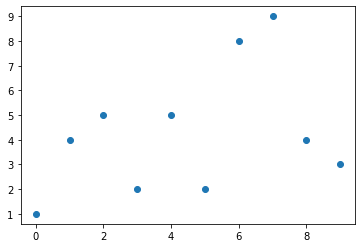
</div>

<div align="center">
    <span class="test">⇓</span> 
 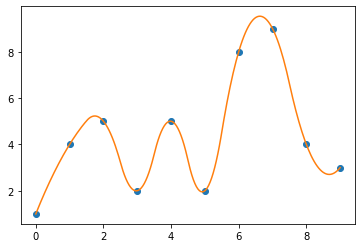
    
</div>

## Example of 1D interpolation



In [1]:
import numpy as np
from scipy.interpolate import interp1d
x = np.arange(10)
y = np.array([1,4,5,2,5,2,8,9,4,3])

# We now compute two functions interpolating the
# data points. Options for kind: cubic, linear, nearest
# previous, next, ...
f = interp1d(x,y,kind='linear')
g = interp1d(x,y,kind='cubic')

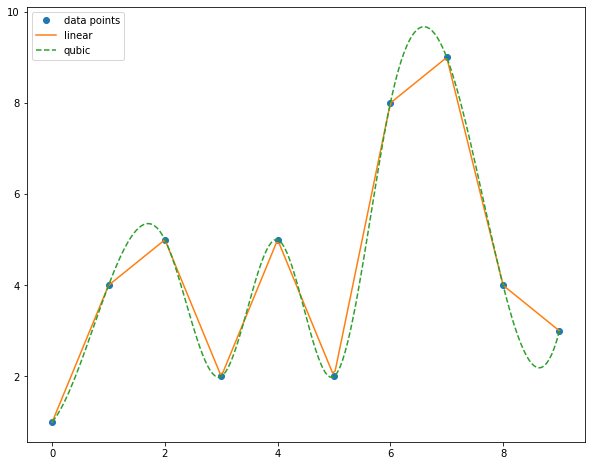

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
xplot = np.linspace(0,9,num=200,endpoint=True)
plt.plot(x,y,'o',xplot,f(xplot),'-',\
        xplot,g(xplot),'--');
plt.legend(['data points','linear','qubic'],
          loc='upper left');

## Example of 2D interpolation ($f(x,y) = \sin(x+y) * \cos(x-y)$)

In [3]:
from scipy.interpolate import Rbf
import math

samples = 200
side = 4*math.pi
plot_grid_size = 200

# Sample points and compute the value of f on them
rng = np.random.default_rng()
x = rng.random(samples)*side-side/2
y = rng.random(samples)*side-side/2
z = np.sin(x+y) * np.cos(x-y)

# compute the interpolating function
rbf = Rbf(x, y, z)

# Compute grid points and interpolation values
# for visualization
edges = np.linspace(-side/2, side/2, plot_grid_size+1)
centers = edges[:-1] + (edges[1] - edges[2])/2
XI, YI = np.meshgrid(centers, centers)
ZI = rbf(XI, YI)

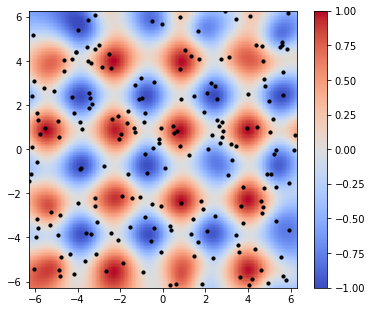

In [4]:
X_edges, Y_edges = np.meshgrid(edges, edges)
lims = dict(cmap='coolwarm', vmin=-1, vmax=1)
plt.figure(figsize=(6,5.1))
plt.pcolormesh(X_edges, Y_edges, ZI, **lims)
plt.colorbar()
plt.scatter(x, y, 10, [[0,0,0]])
plt.xlim(-side/2, side/2)
plt.ylim(-side/2, side/2);

* black dots: the points we sampled
* blue to red: interpolation value

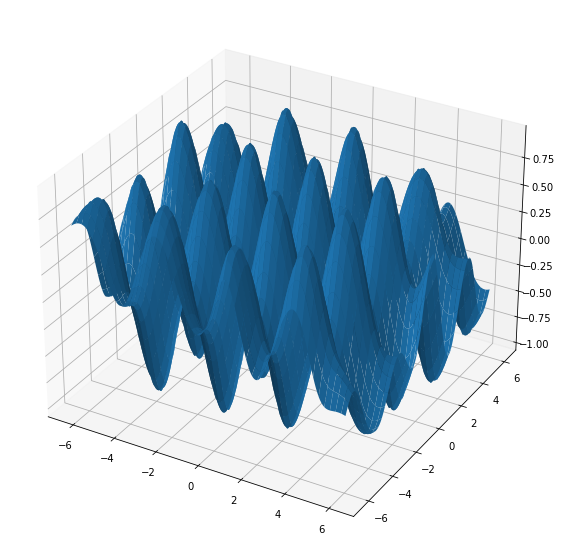

In [5]:
# 3d visualization
import mpl_toolkits
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(XI, YI, ZI)
plt.show();

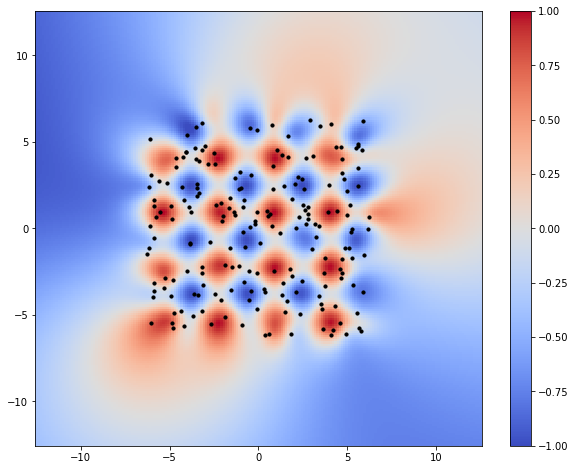

In [6]:
# broader view
side = 8*math.pi
# Compute grid points and interpolation values
edges = np.linspace(-side/2, side/2, plot_grid_size+1)
centers = edges[:-1] + (edges[1] - edges[2])/2
XI, YI = np.meshgrid(centers, centers)
ZI = rbf(XI, YI)
# visualization
X_edges, Y_edges = np.meshgrid(edges, edges)
plt.figure(figsize=(10,8))
plt.pcolormesh(X_edges, Y_edges, ZI, **lims)
plt.colorbar()
plt.scatter(x, y, 10, [[0,0,0]])
plt.xlim(-side/2, side/2)
plt.ylim(-side/2, side/2);